In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
file_name = ['FTO_blank', 'FTO_RT_rinse_2', 'FTO_60_rinse_2', 'FTO_200_rinse_3', 'FTO_200_air_rinse_2', 'FTO_300_air']
def file(count):
    name = file_name[count]
    data = pd.read_excel(f'{name}.xlsx')
    return data
file(0)

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.090598,0.000299,0.077785,0.000055,0.078006,0.000856,0.078567,0.001790,0.080878,0.003679,0.096981,0.005594
1,0.091130,0.000058,0.078331,0.000057,0.078549,0.000922,0.079028,0.001930,0.081427,0.003738,0.097567,0.005613
2,0.092118,0.000069,0.079313,0.000085,0.079557,0.000959,0.080047,0.002007,0.082428,0.003770,0.098548,0.005850
3,0.093123,0.000075,0.080324,0.000100,0.080554,0.000982,0.081035,0.002054,0.083440,0.003838,0.099548,0.005879
4,0.094105,0.000079,0.081331,0.000116,0.081551,0.001005,0.082041,0.002091,0.084448,0.003888,0.100532,0.006074
...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0.087962,0.000204,0.076159,0.000632,0.076270,0.001172,0.077259,0.002413,0.076835,0.004645,NaN,NaN
1202,0.088942,0.000205,0.077141,0.000639,0.077227,0.001181,0.077713,0.002488,0.077485,0.004650,NaN,NaN
1203,0.089962,0.000209,0.077701,0.000636,0.077732,0.001090,NaN,NaN,0.077751,0.004557,NaN,NaN
1204,0.090491,0.000199,NaN,NaN,NaN,NaN,NaN,NaN,0.077720,0.004455,NaN,NaN


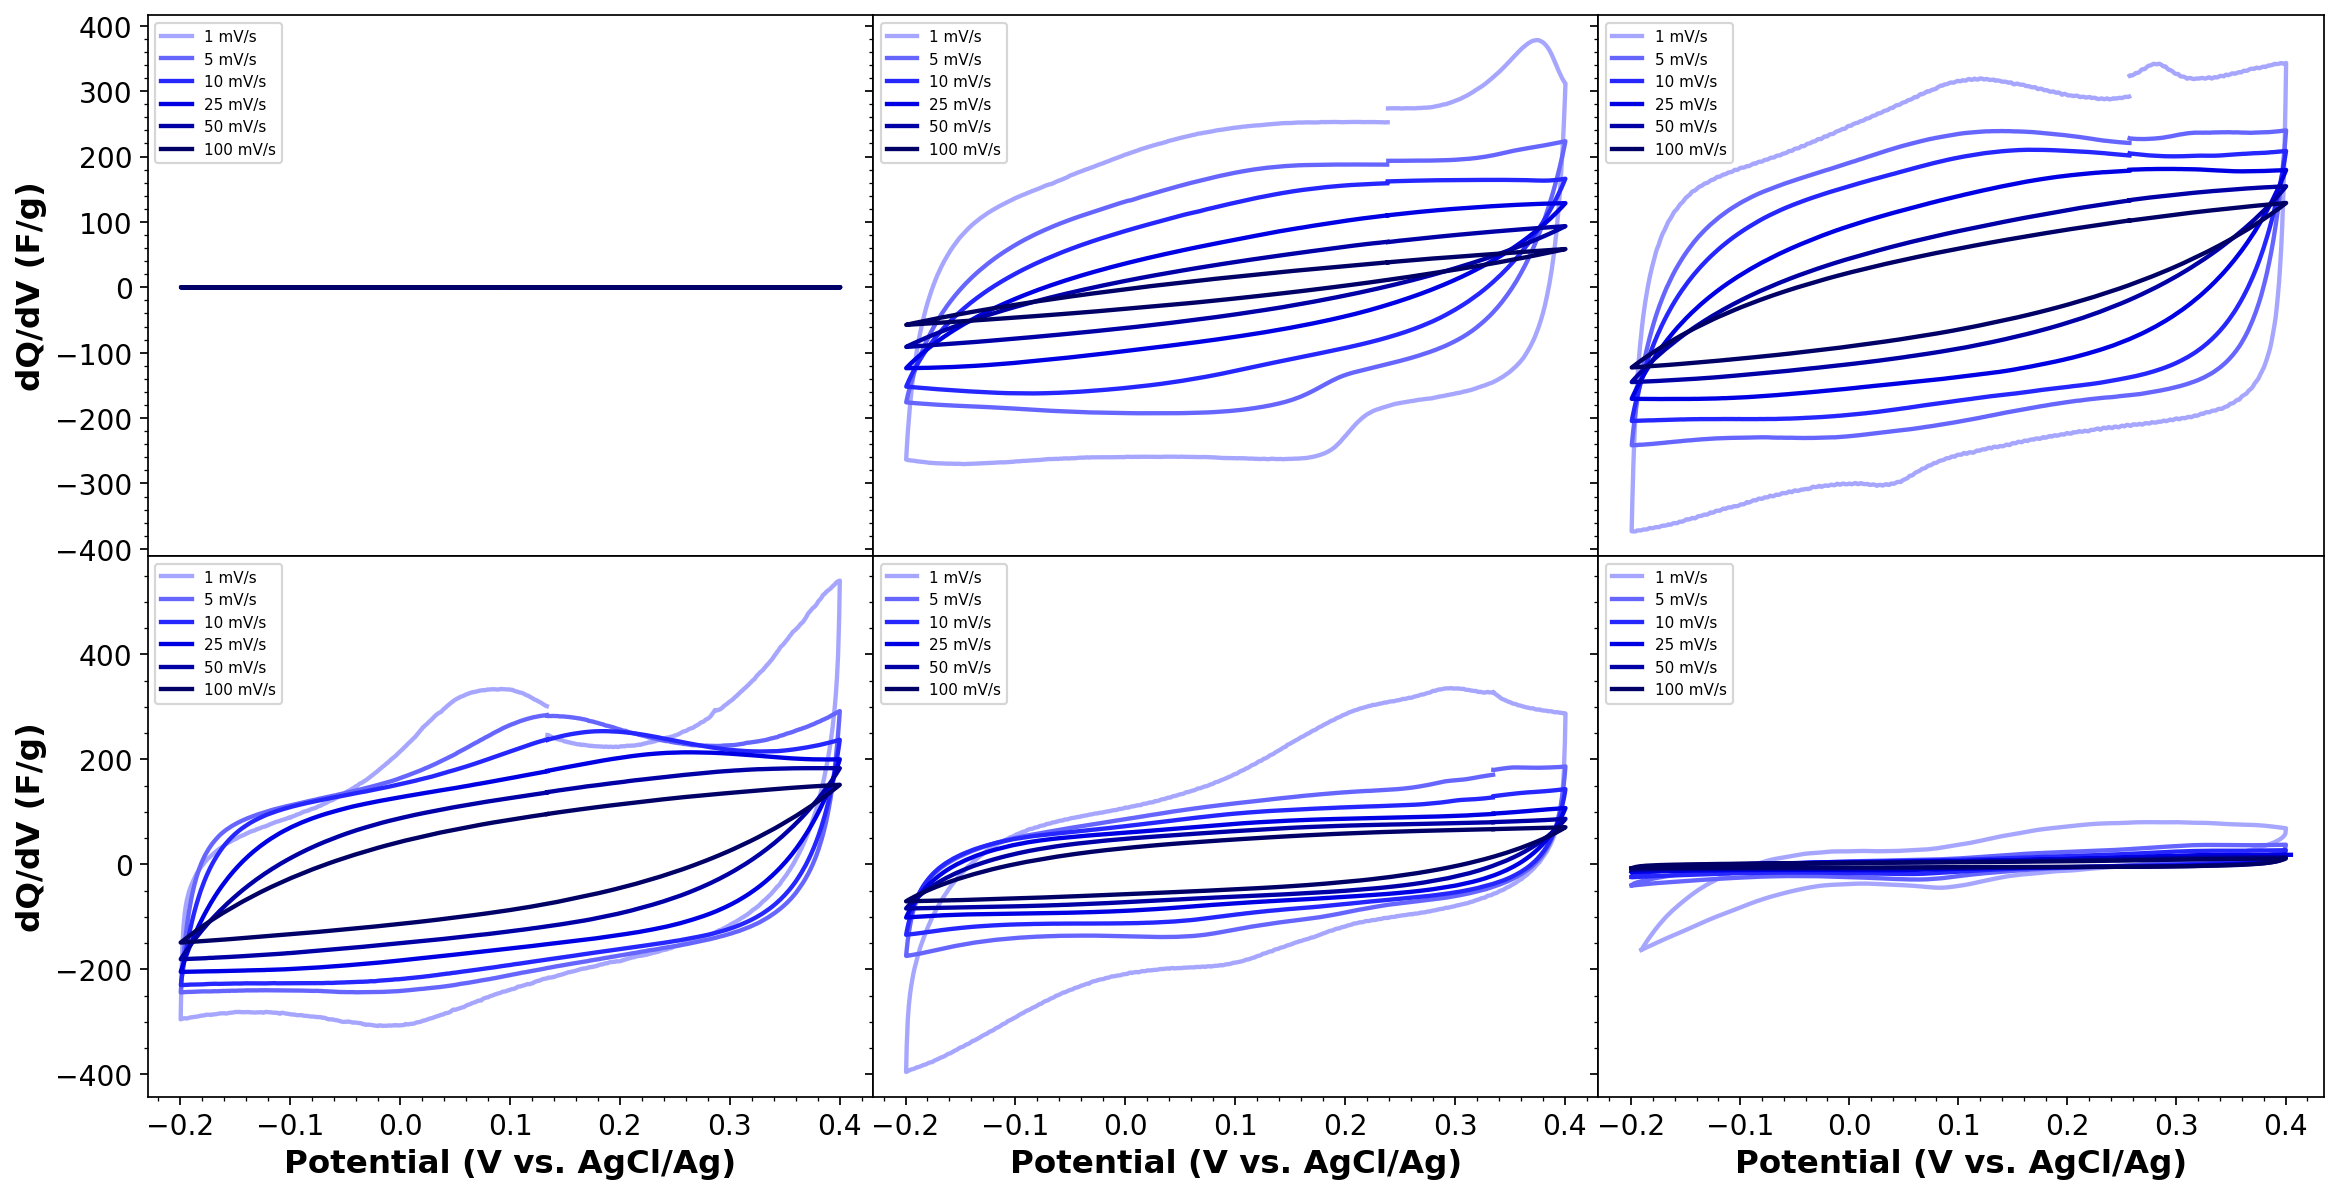

In [23]:
scan_rate = [1, 5, 10, 25, 50, 100]

def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

fig = plt.figure(figsize=(18,9), dpi=156)
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')

count = 0

for ax in axs.flat:
    c = 0.1
    count +=1
    for i in range(0, len(scan_rate)*2 - 1, 2):
        c += 0.25
        data = file(count - 1)
        ax.plot(np.array(data.iloc[:, i]),
                np.array(data.iloc[:, i+1])/(scan_rate[int(i/2)]),
                linewidth = 2,
                color = lighten_color('blue', c),
                label = f'{scan_rate[int(i/2)]} mV/s')

    ax.set_xlabel ('Potential (V vs. AgCl/Ag)', fontsize = 15, weight = 'bold')
    ax.set_ylabel('dQ/dV (F/g)', fontsize = 15, weight = 'bold')
#    ax.set(xlabel = 'Potential (V vs. AgCl/Ag)', ylabel = 'dQ/dV (F/g)', ylim = (-450, 450))
    ax.label_outer()
    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)
    ax.legend(loc = 'upper left', fontsize = 7)
    ax.minorticks_on()

#plt.savefig('CV_mixture.tif', bbox_inches = 'tight')
plt.show()